In [1]:
import pickle
def read_pickle(file_name, base_path="./"):
    with open(f'{base_path}/{file_name}', 'rb') as handle:
        try:
            return pickle.load(handle)
        except Exception as err:
            print('fail to load pickle file.')
            return None

In [2]:
import pandas as pd


dat = read_pickle('dataset-show-user2item-20230310-checkpoints-test-dataset.pickle')


In [3]:
dat.head(1)

,userid,uuid,timestamp,date,hour,age,gender,title,final_score,1_last_day_total_view_count,...,5_last_day_total_click_count,5_last_day_interaction_count,user_category,user_title_embedding,is_adult,publish_time,cat0,content_ner,item_title_embedding,y
0,1015025000917002403,38348653294796800,1678269417626,20230308,09,None,None,來互相傷害衝獎勵,0.0425531914893617,1,...,0,0,None,None,False,1668080631285,['誰說一類組都是書呆子'],{},"[-0.07111664861440659, -0.007332282606512308, ...",1


In [4]:

cat0_set = set()
for cs in list(dat['cat0']):
    for c in eval(cs):
        cat0_set.add(c)
        

In [5]:
cat0_set

{'228連假做什麼!',
 'AI機器人殺瘋啦！',
 'Cos-Show大賞',
 '一些小日常小美好',
 '一點夢想的故事',
 '不可能這樣也能睡吧',
 '二次元才有的可愛',
 '你才是小廢物',
 '創作者奇幻世界',
 '原來是原子回憶秀',
 '合夥人召集令',
 '大台北拉麵爭霸戰',
 '好神SHOW市集限定',
 '我的同學不紅太可惜',
 '戴口罩最上相獎',
 '插畫家の寶哥二創秀',
 '最得意的手機哏圖收藏',
 '最懷念的童年卡通橋段',
 '有閑明星大亂鬥',
 '橘子嘉年華延續戰',
 '橘子嘉年華練習賽',
 '甚麼都有甚麼都不奇怪',
 '誰說一類組都是書呆子',
 '讓人氣到牙癢癢的綠茶',
 '跨年要幹嘛',
 '遊戲寶物NPC秀一波',
 '過年就是要打電動啊！',
 '過年要做的事'}

In [6]:
list(dat['user_category'])[:10]

[None,
 '{"click": {"cat2": {"獨家原創": {"cnt": 1, "pref": 1.0}}, "cat1": {"劇情": {"cnt": 1, "pref": 1.0}}, "cat0": {"漫畫星": {"cnt": 1, "pref": 1.0}}}}',
 None,
 '{"click": {"cat2": {"科幻": {"cnt": 1, "pref": 0.2}, "獨家原創": {"cnt": 2, "pref": 0.4}, "偶像": {"cnt": 2, "pref": 0.4}}, "cat1": {"冒險動作": {"cnt": 1, "pref": 0.3333}, "幽默搞笑": {"cnt": 2, "pref": 0.6666}}, "cat0": {"漫畫星": {"cnt": 3, "pref": 1.0}}}}',
 '{"click": {"cat2": {"科幻": {"cnt": 1, "pref": 0.2}, "獨家原創": {"cnt": 2, "pref": 0.4}, "偶像": {"cnt": 2, "pref": 0.4}}, "cat1": {"冒險動作": {"cnt": 1, "pref": 0.3333}, "幽默搞笑": {"cnt": 2, "pref": 0.6666}}, "cat0": {"漫畫星": {"cnt": 3, "pref": 1.0}}}}',
 None,
 None,
 None,
 None,
 None]

In [25]:
dat_.shape

(107383, 1)

In [27]:
265095 - 107383

157712

In [8]:
len(dat[dat['y']==1])

14911

In [9]:
len(dat[dat['y']==0])

250184

In [24]:
dat_ = dat[['age']].dropna()
dat_['age'] = dat_['age'].apply(lambda x: int(x))

Text(0.5, 0, 'age')

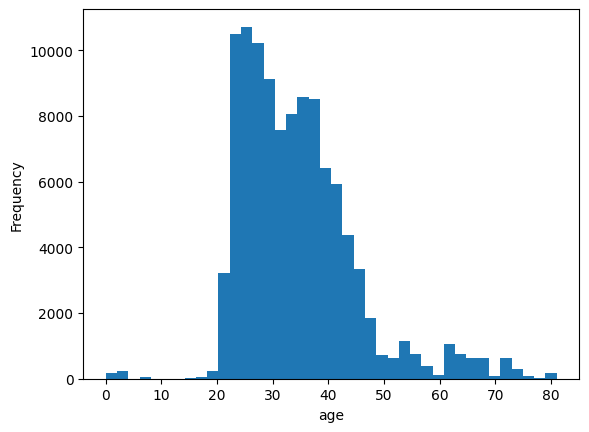

In [22]:
import matplotlib.pyplot as plt
dat_.age.plot.hist(stacked=True, bins=40)
plt.xlabel('age')

In [14]:
dat_

,age
1,39
8,39
18,29
21,24
22,31
...,...
265087,35
265088,39
265091,26
265092,31


In [35]:
dat_ = dat[['cat0']]

In [32]:
dat_.describe()

,gender
count,265095
unique,4
top,unknown
freq,108496


In [40]:
gender2num = dict()
for record in dat_.to_dict('records'):
    cat0 = eval(record['cat0'])
    #if len(cat0) == 0:
    #    gender2num['unknown'] +=1
    for c in cat0:
        if c not in gender2num:

            gender2num[c] = 0
        gender2num[c]  +=1

In [41]:
gender2num

{'誰說一類組都是書呆子': 8313,
 '你才是小廢物': 12727,
 '原來是原子回憶秀': 8613,
 '有閑明星大亂鬥': 8041,
 '橘子嘉年華練習賽': 25367,
 '甚麼都有甚麼都不奇怪': 2922,
 '遊戲寶物NPC秀一波': 8453,
 '好神SHOW市集限定': 4399,
 '二次元才有的可愛': 2594,
 '228連假做什麼!': 7771,
 '橘子嘉年華延續戰': 5368,
 'AI機器人殺瘋啦！': 1684,
 '合夥人召集令': 734,
 '最懷念的童年卡通橋段': 10860,
 '不可能這樣也能睡吧': 11783,
 'Cos-Show大賞': 32364,
 '創作者奇幻世界': 2556,
 '過年要做的事': 18690,
 '跨年要幹嘛': 18276,
 '戴口罩最上相獎': 13641,
 '過年就是要打電動啊！': 3805,
 '我的同學不紅太可惜': 11269,
 '最得意的手機哏圖收藏': 11442,
 '插畫家の寶哥二創秀': 15264,
 '讓人氣到牙癢癢的綠茶': 7289,
 '大台北拉麵爭霸戰': 5107,
 '一些小日常小美好': 2861,
 '一點夢想的故事': 2902}

In [42]:
dat['popularity_score'] = dat['final_score']

Text(0.5, 0, 'popularity_score')

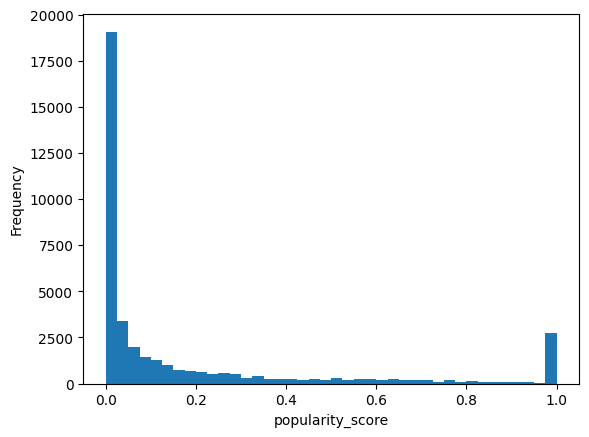

In [52]:
import matplotlib.pyplot as plt
dat_ = dat[['popularity_score']].dropna()
dat_['popularity_score'] = dat_['popularity_score'].apply(lambda x: float(x))
dat_.popularity_score.plot.hist(stacked=True, bins=40)
plt.xlabel('popularity_score')

In [47]:
list(dat_['popularity_score'])[0]

'0.0425531914893617'

In [88]:
import matplotlib.pyplot as plt
dat_ = dat[['5_last_day_total_view_count', '5_last_day_total_click_count']].fillna(0)
dat_['5_last_day_total_view_count'] = dat_['5_last_day_total_view_count'].apply(lambda x: float(x))
dat_['5_last_day_total_click_count'] = dat_['5_last_day_total_click_count'].apply(lambda x: float(x))
dat_ = dat_[dat_['5_last_day_total_click_count']>= 0]
#dat_['5_last_day_total_click_count'].plot.hist(stacked=True, bins=50)
dat_.describe([0.1, 0.25, 0.5, 0.75,0.85,0.9, 0.95])
#plt.xlabel('5_last_day_total_click_count')

,5_last_day_total_view_count,5_last_day_total_click_count
count,265095.000000,265095.000000
mean,598.975767,28.618005
std,2563.838121,257.240195
min,0.000000,0.000000
10%,0.000000,0.000000
25%,2.000000,0.000000
50%,17.000000,0.000000
75%,67.000000,0.000000
85%,144.000000,2.000000
90%,574.600000,6.000000


In [100]:
def get_publish_time_to_now(df, event_time_col='timestamp', publish_time_col='publish_time', time_type=['min', 'hour', 'day']):
    """TODO: For computing time period, use `process_time_period` instead of this from now on
    """

    time_type_to_sec = {'min': 60, 'hour': 3600, 'day': 3600*24}

    for t in time_type:

        df[f'{t}_to_current'] = df.apply(
            lambda x: (x[event_time_col]-x[publish_time_col]) / (time_type_to_sec[t]*1000), axis=1)

    return df

In [118]:

dat_ = dat[dat['y']!=100][['timestamp', 'publish_time', 'y']].dropna()
dat_['timestamp'] = dat_['timestamp'].apply(lambda x: float(x))
dat_['publish_time'] = dat_['publish_time'].apply(lambda x: float(x))
df = get_publish_time_to_now(dat_[['timestamp' ,'publish_time']])

In [119]:
df

,timestamp,publish_time,min_to_current,hour_to_current,day_to_current
0,1.678269e+12,1.668081e+12,169813.105683,2830.218428,117.925768
1,1.678268e+12,1.668081e+12,169797.128583,2829.952143,117.914673
2,1.676910e+12,1.668083e+12,147126.729100,2452.112152,102.171340
3,1.677994e+12,1.669185e+12,146816.855333,2446.947589,101.956150
4,1.677994e+12,1.669185e+12,146816.755350,2446.945923,101.956080
...,...,...,...,...,...
265090,1.678490e+12,1.677460e+12,17165.983917,286.099732,11.920822
265091,1.678443e+12,1.677503e+12,15666.599267,261.109988,10.879583
265092,1.678444e+12,1.677503e+12,15689.665933,261.494432,10.895601
265093,1.678445e+12,1.677503e+12,15701.435167,261.690586,10.903774


Text(0.5, 0, '[Y=1 or Y=1] event_time - published_time')

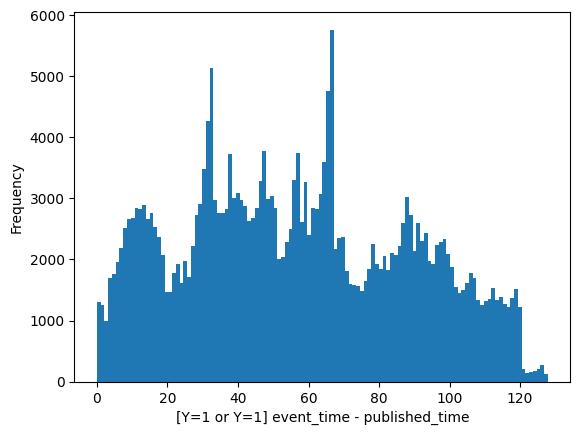

In [120]:
df
df['day_to_current'].plot.hist(stacked=True, bins=120)
plt.xlabel('[Y=1 or Y=0] event_time - published_time')

Text(0.5, 0, '5_last_day_ctr')

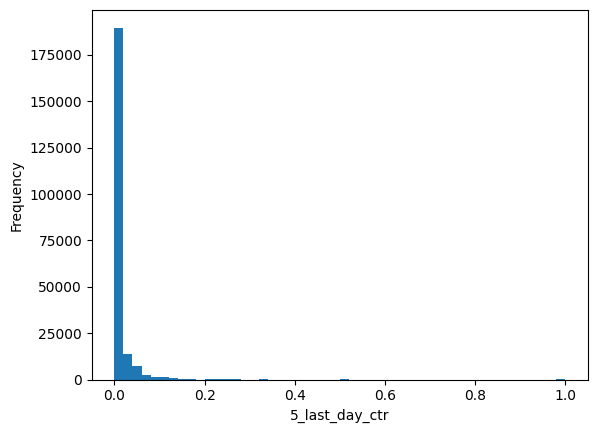

In [64]:
import matplotlib.pyplot as plt
dat_ = dat[['5_last_day_total_click_count','5_last_day_total_view_count']].dropna()
dat_['5_last_day_total_click_count'] = dat_['5_last_day_total_click_count'].apply(lambda x: float(x))
dat_['5_last_day_total_view_count'] = dat_['5_last_day_total_view_count'].apply(lambda x: float(x))
dat_['5_last_day_ctr'] = dat_['5_last_day_total_click_count'] / dat_['5_last_day_total_view_count']
dat_['5_last_day_ctr'] = dat_['5_last_day_ctr'].apply(lambda x: x if isinstance(x, float) and 0 <= x <=1 else 0)
dat_['5_last_day_ctr'].plot.hist(stacked=True, bins=50)
plt.xlabel('5_last_day_ctr')

In [59]:
dat_

,5_last_day_total_click_count,5_last_day_total_view_count,5_last_day_ctr
0,0.0,7.0,0.000000
1,0.0,7.0,0.000000
2,3.0,458.0,0.006550
3,0.0,23.0,0.000000
4,0.0,23.0,0.000000
...,...,...,...
265087,2.0,15.0,0.133333
265088,6.0,1335.0,0.004494
265089,4.0,167.0,0.023952
265090,1.0,137.0,0.007299


In [7]:
*'123,34'

SyntaxError: can't use starred expression here (30387362.py, line 1)

In [ ]:
5_last_day_total_click_count